title: Early Pain Points: Are there any specific early customer pain points leading to lapse?  
author: James Arch  
date: 2019-01-20  
region: EU  
link: https://docs.google.com/presentation/d/14t2T5NBxAv5lyrKEk6WhK2yVyFRoBKtppESjukuUsog/edit?usp=sharing  
tags: product, growth, lapse, retention, pain point, project wow, activity, early engagement, early  
summary: When looking into user lapse, we found that churn is much worse in ESP, GBR and NEUR markets (on the other hand DEU has the majority of power users); we have a large chunk of not that active Business users (in the retained category - these people are clearly not using it daily for a business); partnerships has historically driven poor quality users - ~25% are forever dormant (just one transaction); somewhat surprisingly organic has a large number of dormant users; there was no real difference in power user share across channels (other than partnerships).

In [78]:
!pip install statsmodels

     |████████████████████████████████| 8.7MB 3.3MB/s eta 0:00:01
     |████████████████████████████████| 235kB 5.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
!pip install seaborn

     |████████████████████████████████| 225kB 1.6MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [79]:
import os

os.chdir("/app")

# Import Libraries
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler
from utils.datalib_database import df_from_sql
from multiprocessing import Pool
import time
import seaborn as sns
import matplotlib.pyplot as plt

overall_start = time.time()

In [8]:
query_base = """
    select *
    from dev.lapse_features_ja
    where ft_mau between '2019-01-01' and '2019-04-01'
"""

In [9]:
df_users = df_from_sql("redshiftreader", query_base)
df_users.info()

{"message": "started", "db": "redshiftreader", "name": "datalib-logger", "args": [], "levelname": "INFO", "pathname": "/usr/local/lib/python3.7/site-packages/datalib/database.py", "filename": "database.py", "module": "database", "lineno": 114, "funcName": "df_from_sql", "created": "20200211T172845", "processName": "MainProcess", "service": "fargo", "environment": "local", "loggerId": "c854f61c-dfad-48fd-8548-1078fa83952f", "hostname": "127.0.1.1"}
{"message": "success", "db": "redshiftreader", "duration": 26.9388, "name": "datalib-logger", "args": [], "levelname": "INFO", "pathname": "/usr/local/lib/python3.7/site-packages/datalib/database.py", "filename": "database.py", "module": "database", "lineno": 124, "funcName": "df_from_sql", "created": "20200211T172912", "processName": "MainProcess", "service": "fargo", "environment": "local", "loggerId": "c854f61c-dfad-48fd-8548-1078fa83952f", "hostname": "127.0.1.1"}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264036 entries, 0 to 2640

In [50]:
df_users = df_users.sort_values(by=["user_group", "ft_mau"])

In [82]:
def sns_distribution(df, column_plot, column_split):
    # Sort the dataframe by target
    for n in df[column_split].unique():
        print(n)
        df_plot = df_users[df_users[column_split] == n]
        sns.kdeplot(df_plot[column_plot], label=n)

    plt.xlim(0, 90)

## Days to MAU

0_retained_power
1_retained
2_lapsed
3_dormant
4_dormant_forever


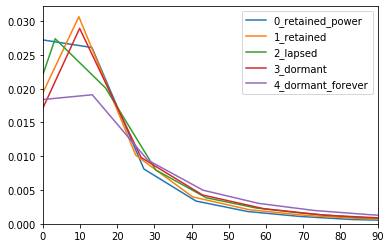

In [83]:
sns_distribution(df_users, "days_to_mau", "user_group")

(0, 85)

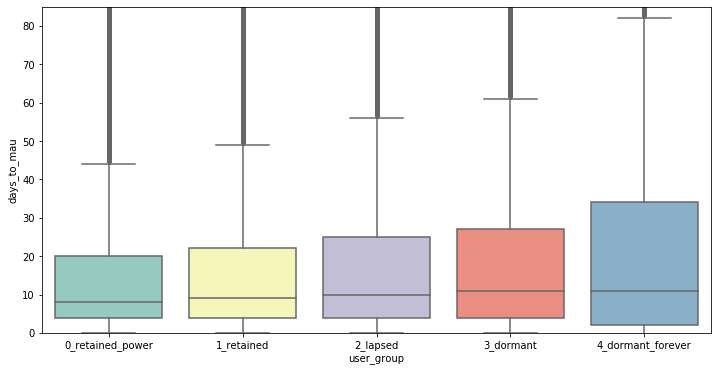

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="user_group", y="days_to_mau", data=df_users, palette="Set3")
plt.ylim(0, 85)

(0, 75)

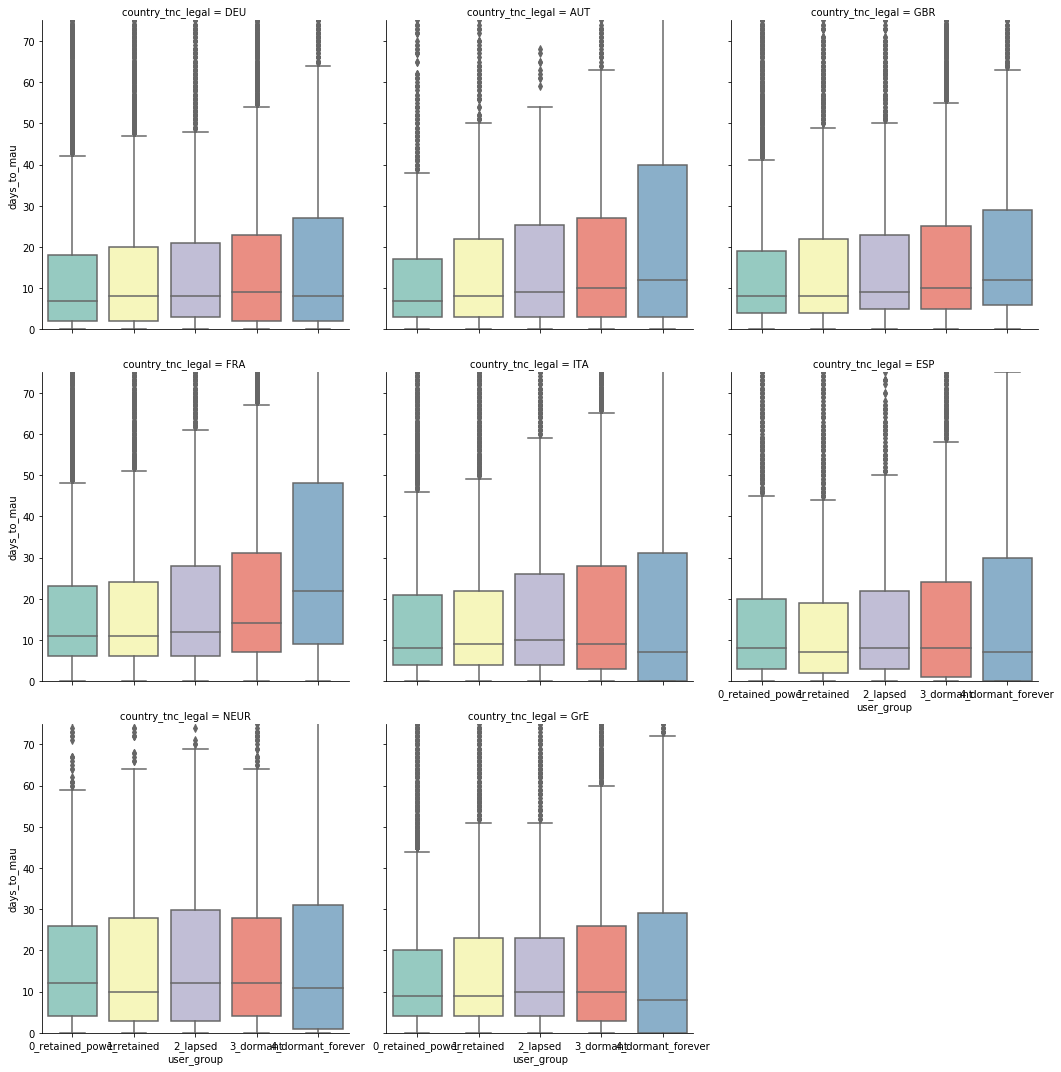

In [84]:
sns.catplot(
    x="user_group",
    y="days_to_mau",
    col="country_tnc_legal",
    col_wrap=3,
    data=df_users,
    kind="box",
    legend_out=True,
    palette="Set3",
)
plt.ylim(0, 75)

(0, 85)

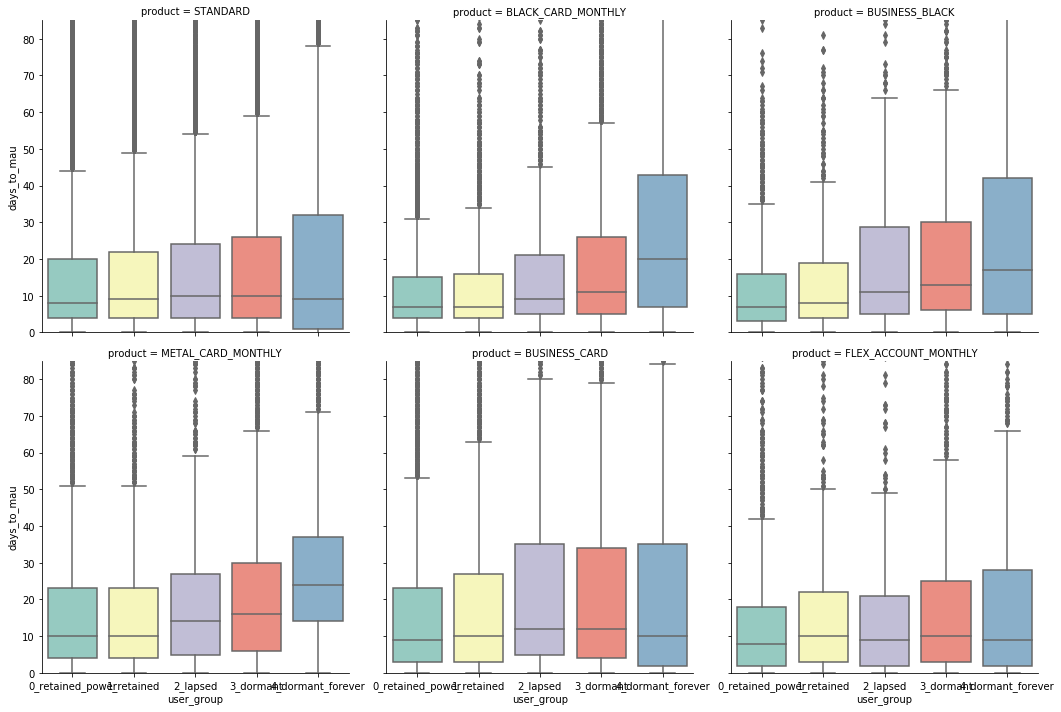

In [87]:
sns.catplot(
    x="user_group",
    y="days_to_mau",
    col="product",
    col_wrap=3,
    data=df_users,
    kind="box",
    legend_out=True,
    palette="Set3",
)
plt.ylim(0, 85)

(0, 85)

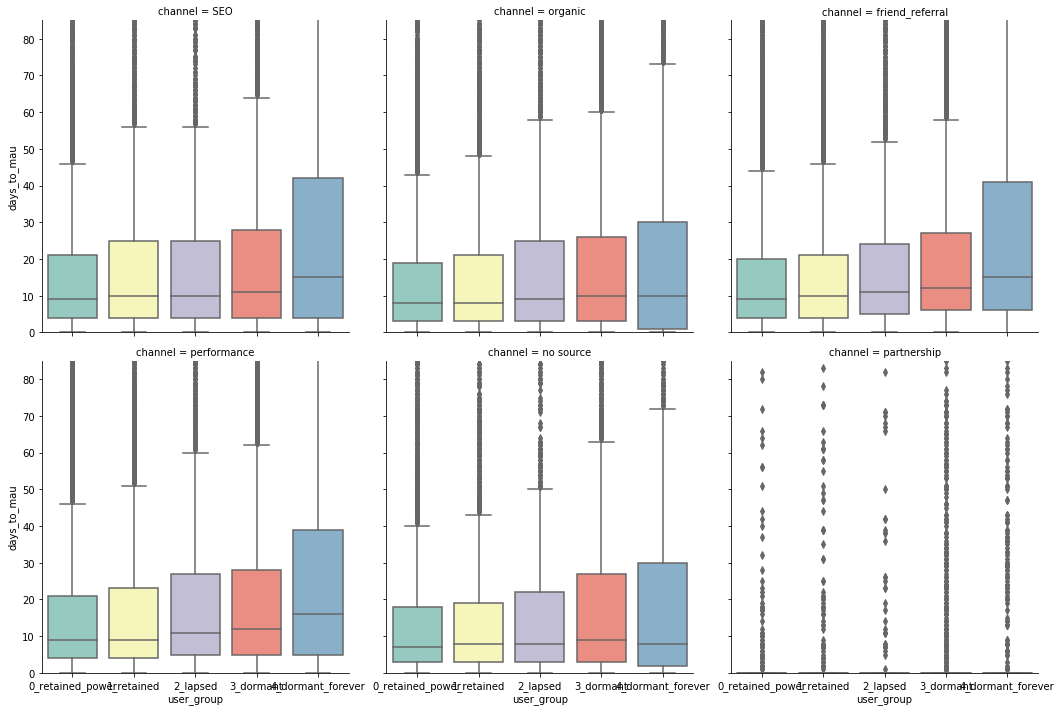

In [88]:
sns.catplot(
    x="user_group",
    y="days_to_mau",
    col="channel",
    col_wrap=3,
    data=df_users,
    kind="box",
    legend_out=True,
    palette="Set3",
)
plt.ylim(0, 85)

## Cards

(0, 35)

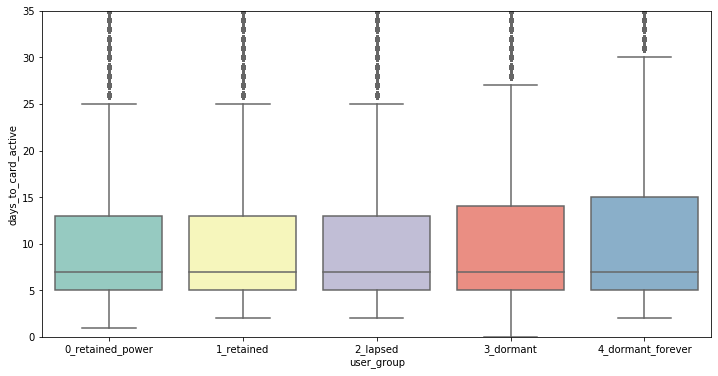

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="user_group", y="days_to_card_active", data=df_users, palette="Set3")
plt.ylim(0, 35)

(0, 35)

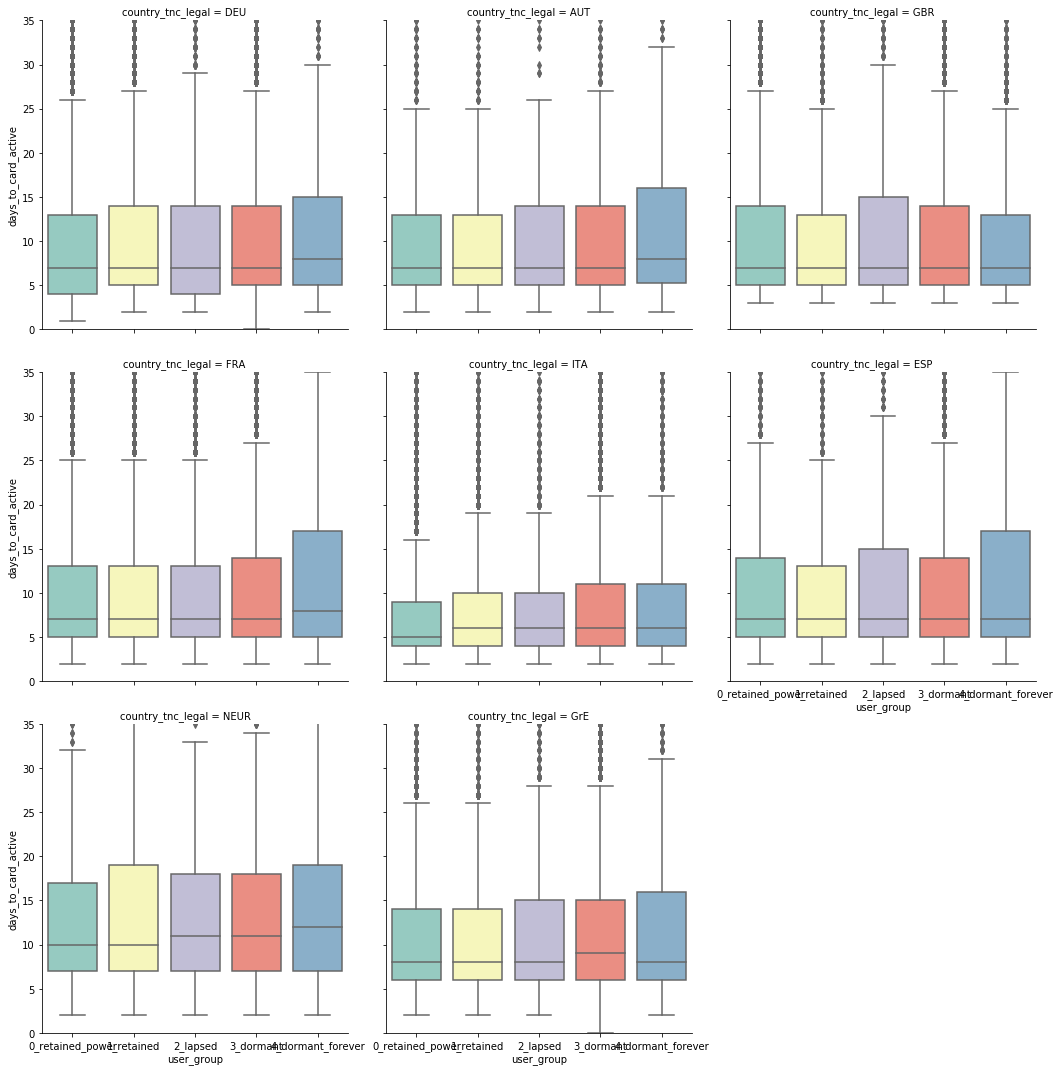

In [56]:
sns.catplot(
    x="user_group",
    y="days_to_card_active",
    col="country_tnc_legal",
    col_wrap=3,
    data=df_users,
    kind="box",
    legend_out=True,
    palette="Set3",
)
plt.ylim(0, 35)

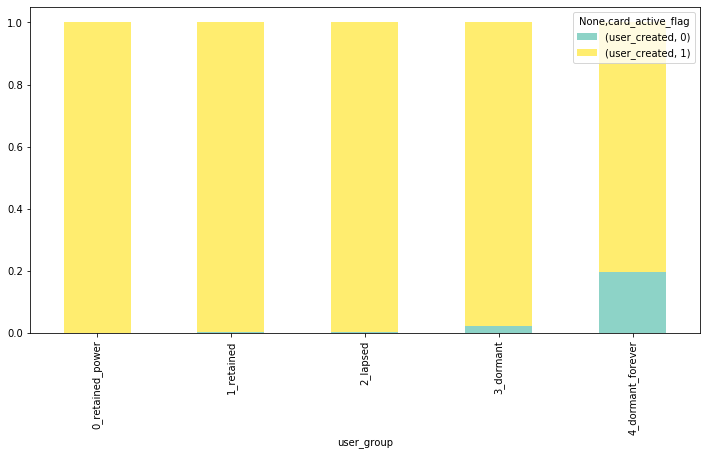

In [89]:
tps = df_users.pivot_table(
    values=["user_created"],
    index="user_group",
    columns="card_active_flag",
    aggfunc="count",
)

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set3")

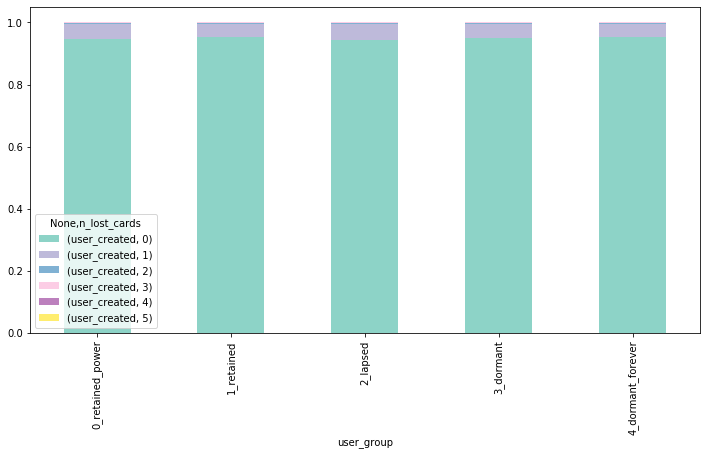

In [114]:
df_users["lost_card_flg"] = np.where(df_users["n_lost_cards"] > 0, 1, 0)
tps = df_users[df_users["card_active_flag"] == 1].pivot_table(
    values=["user_created"], index="user_group", columns="n_lost_cards", aggfunc="count"
)

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set3")

## Rejected Transactions

(0, 10)

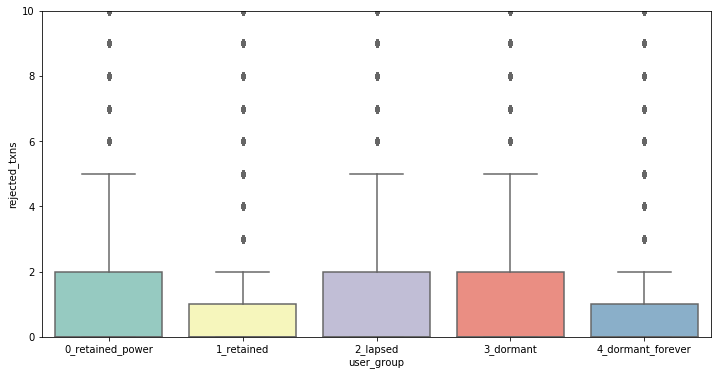

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="user_group", y="rejected_txns", data=df_users, palette="Set3")
plt.ylim(0, 10)

(0, 15)

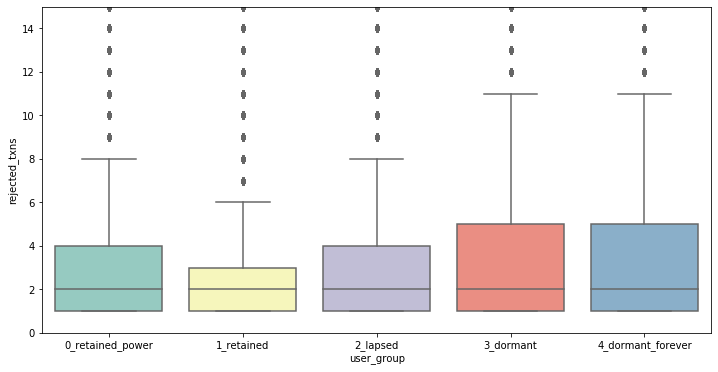

In [102]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="user_group",
    y="rejected_txns",
    data=df_users[df_users["rejected_txns"] > 0],
    palette="Set3",
)
plt.ylim(0, 15)

(0, 15)

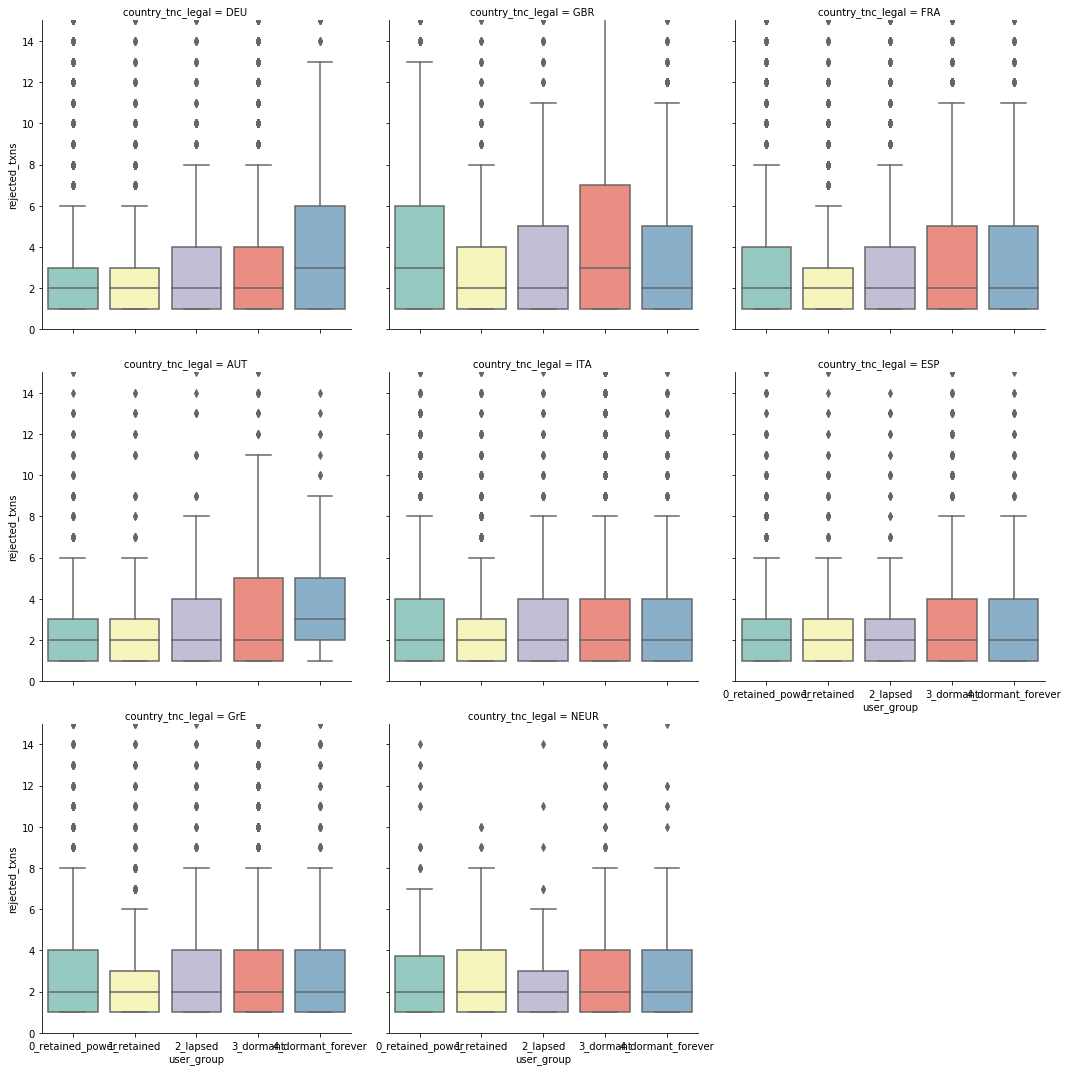

In [104]:
sns.catplot(
    x="user_group",
    y="rejected_txns",
    col="country_tnc_legal",
    col_wrap=3,
    data=df_users[df_users["rejected_txns"] > 0],
    kind="box",
    legend_out=True,
    palette="Set3",
)
plt.ylim(0, 15)

(0, 15)

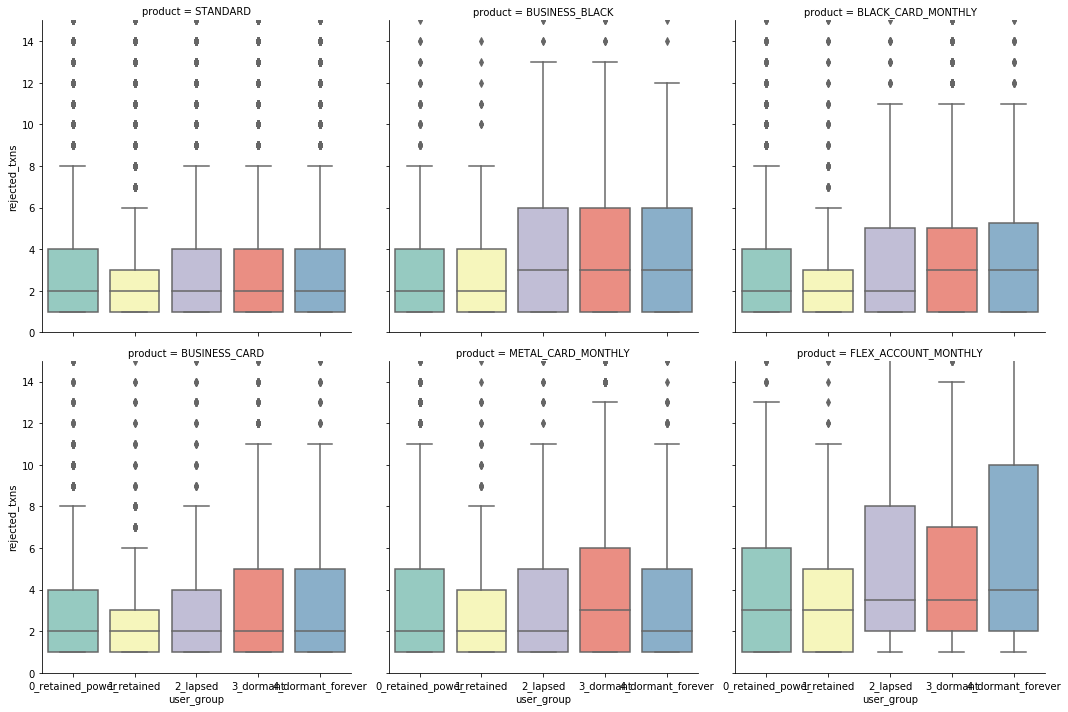

In [105]:
sns.catplot(
    x="user_group",
    y="rejected_txns",
    col="product",
    col_wrap=3,
    data=df_users[df_users["rejected_txns"] > 0],
    kind="box",
    legend_out=True,
    palette="Set3",
)
plt.ylim(0, 15)

(0, 15)

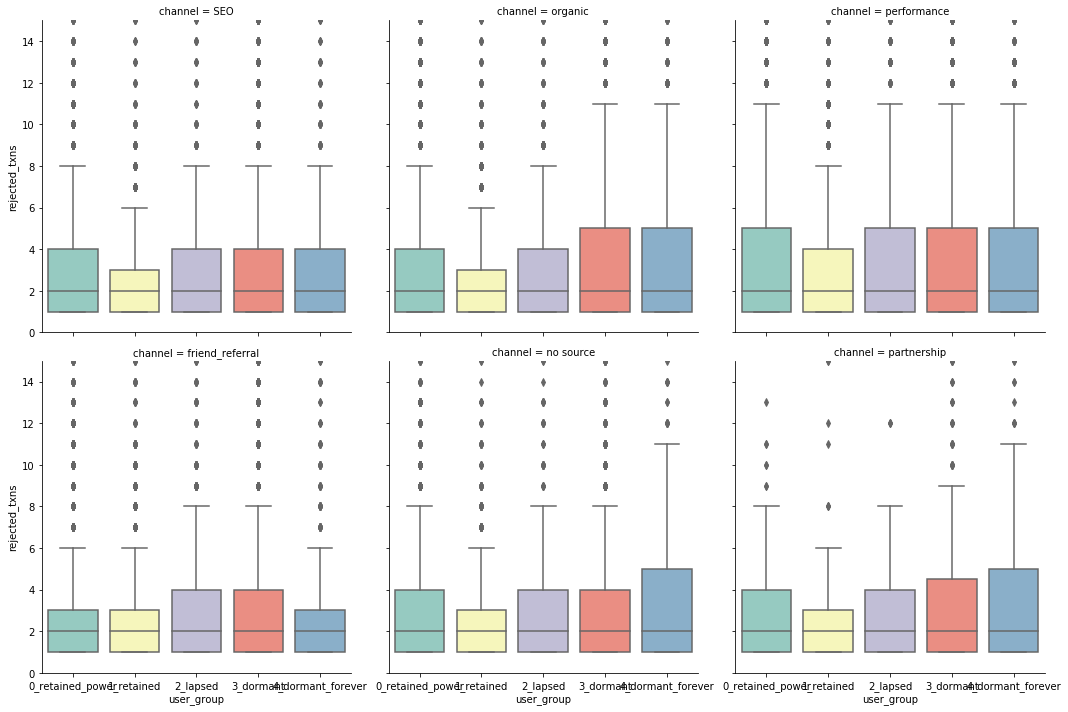

In [106]:
sns.catplot(
    x="user_group",
    y="rejected_txns",
    col="channel",
    col_wrap=3,
    data=df_users[df_users["rejected_txns"] > 0],
    kind="box",
    legend_out=True,
    palette="Set3",
)
plt.ylim(0, 15)

## CS contacts

(0, 10)

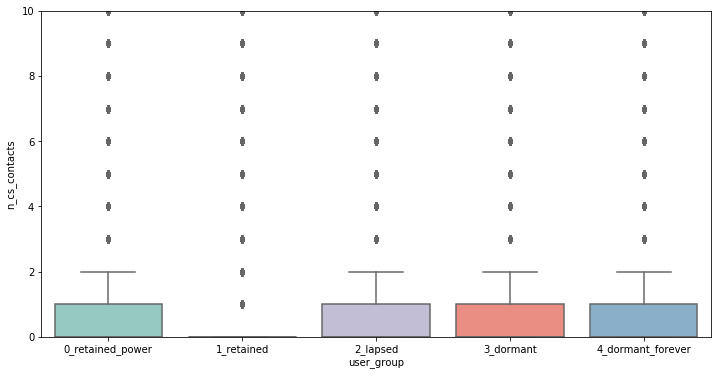

In [98]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="user_group", y="n_cs_contacts", data=df_users, palette="Set3")
plt.ylim(0, 10)

(0, 10)

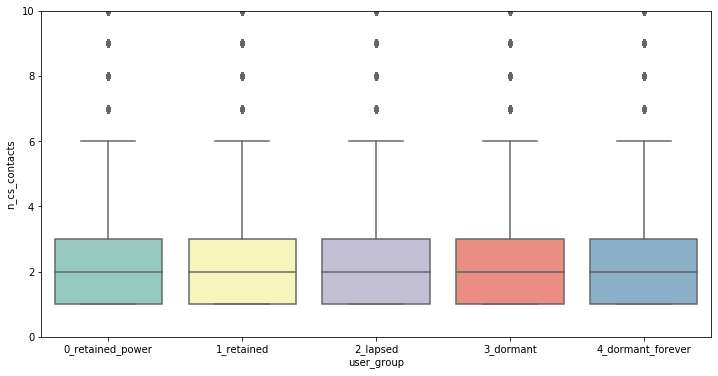

In [97]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="user_group",
    y="n_cs_contacts",
    data=df_users[df_users["n_cs_contacts"] > 0],
    palette="Set3",
)
plt.ylim(0, 10)

(0, 10)

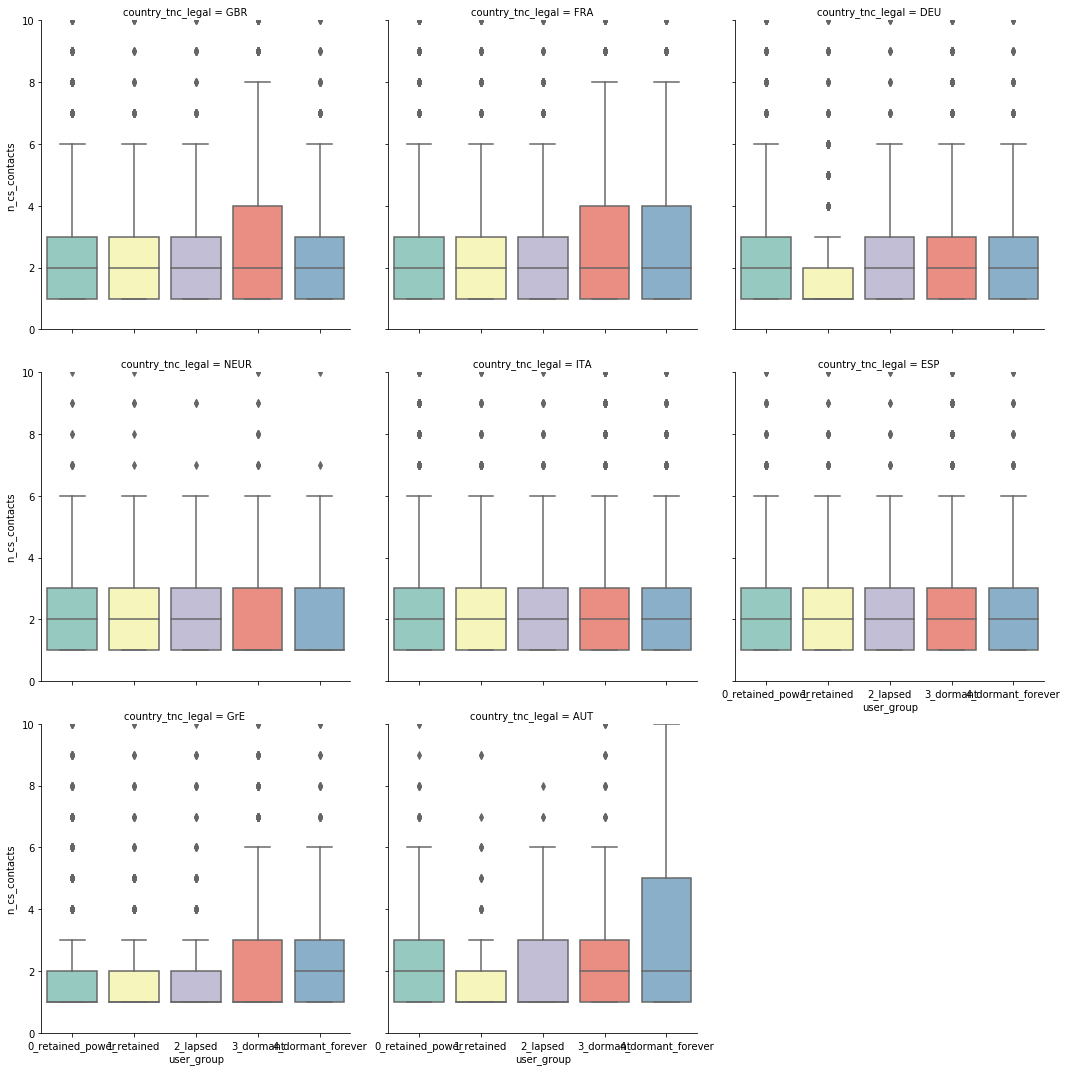

In [107]:
sns.catplot(
    x="user_group",
    y="n_cs_contacts",
    col="country_tnc_legal",
    col_wrap=3,
    data=df_users[df_users["n_cs_contacts"] > 0],
    kind="box",
    legend_out=True,
    palette="Set3",
)
plt.ylim(0, 10)

(0, 12)

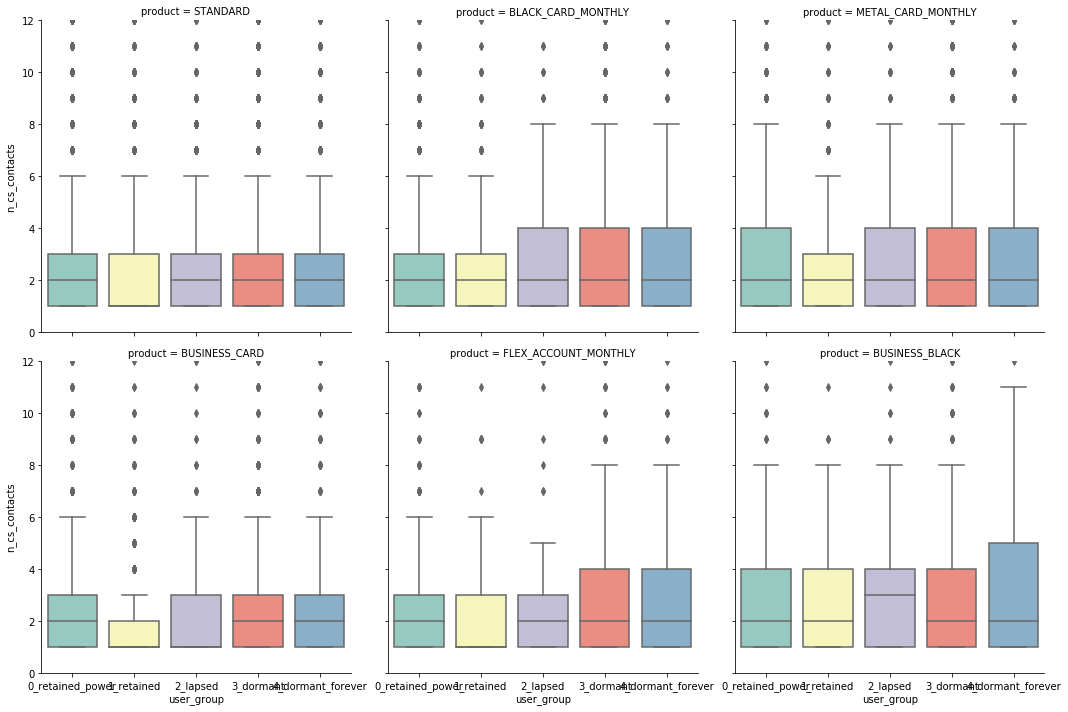

In [109]:
sns.catplot(
    x="user_group",
    y="n_cs_contacts",
    col="product",
    col_wrap=3,
    data=df_users[df_users["n_cs_contacts"] > 0],
    kind="box",
    legend_out=True,
    palette="Set3",
)
plt.ylim(0, 12)

(0, 12)

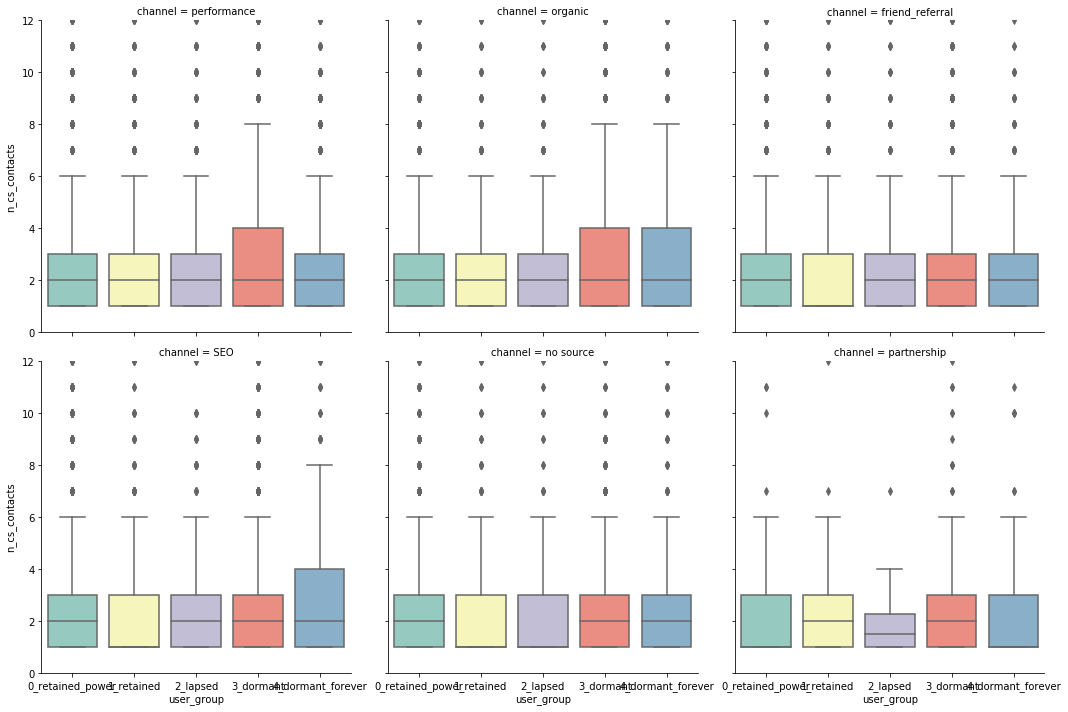

In [111]:
sns.catplot(
    x="user_group",
    y="n_cs_contacts",
    col="channel",
    col_wrap=3,
    data=df_users[df_users["n_cs_contacts"] > 0],
    kind="box",
    legend_out=True,
    palette="Set3",
)
plt.ylim(0, 12)

(0, 10)

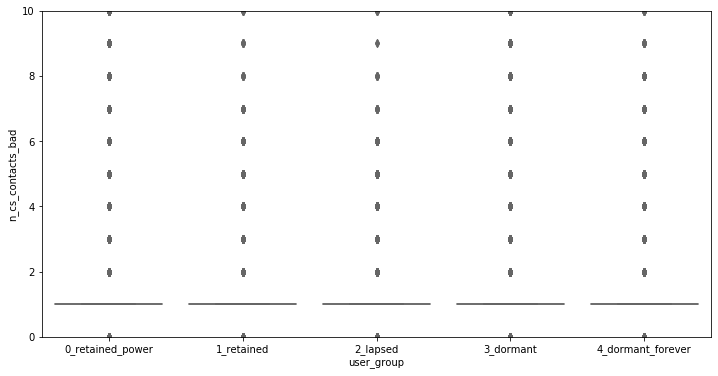

In [112]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="user_group", y="n_cs_contacts_bad", data=df_users, palette="Set3")
plt.ylim(0, 10)

(0, 10)

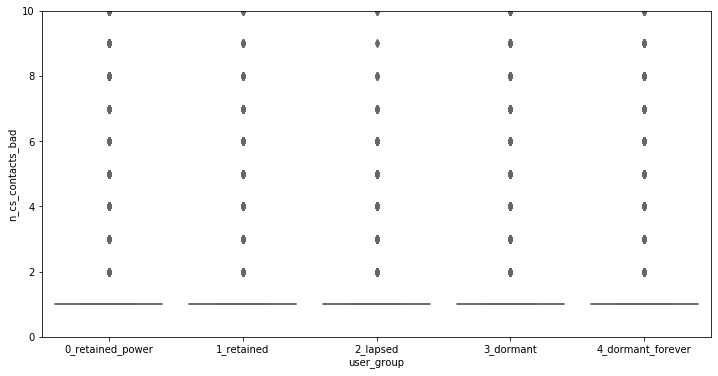

In [113]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="user_group",
    y="n_cs_contacts_bad",
    data=df_users[df_users["n_cs_contacts_bad"] > 0],
    palette="Set3",
)
plt.ylim(0, 10)

## Time to KYC

(0, 10)

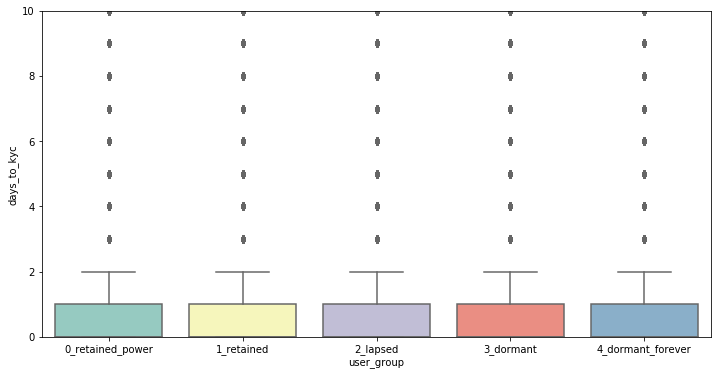

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="user_group", y="days_to_kyc", data=df_users, palette="Set3")
plt.ylim(0, 10)

(0, 5)

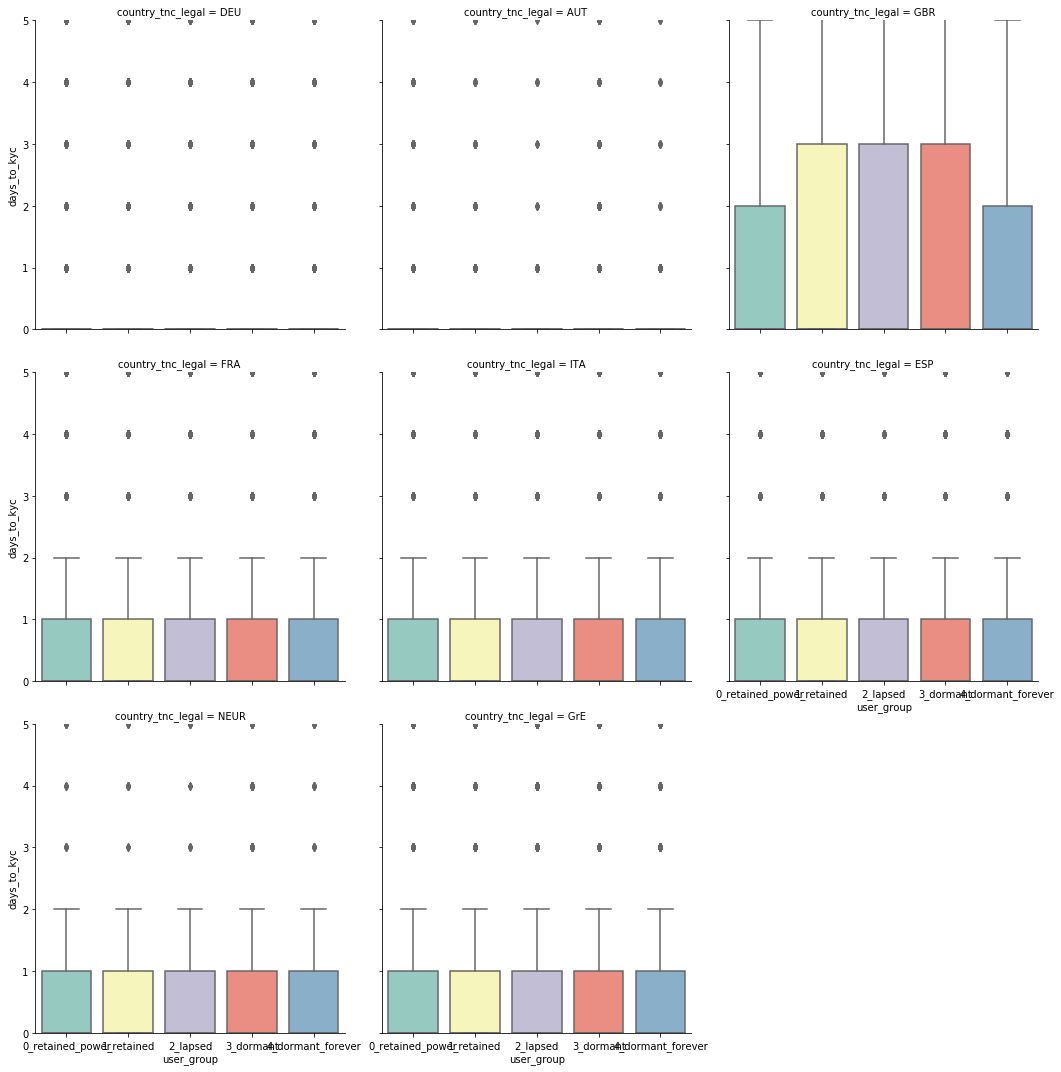

In [64]:
sns.catplot(
    x="user_group",
    y="days_to_kyc",
    col="country_tnc_legal",
    col_wrap=3,
    data=df_users,
    kind="box",
    legend_out=True,
    palette="Set3",
)
plt.ylim(0, 5)

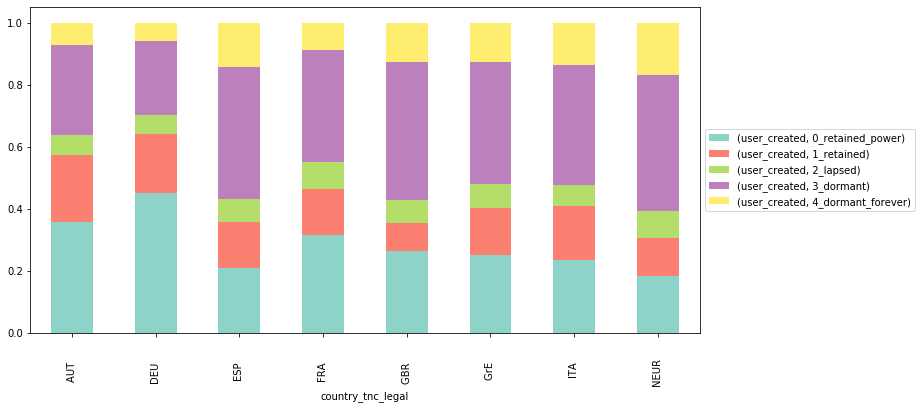

In [65]:
tps = df_users.pivot_table(
    values=["user_created"],
    index="country_tnc_legal",
    columns="user_group",
    aggfunc="count",
)
tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set3")
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

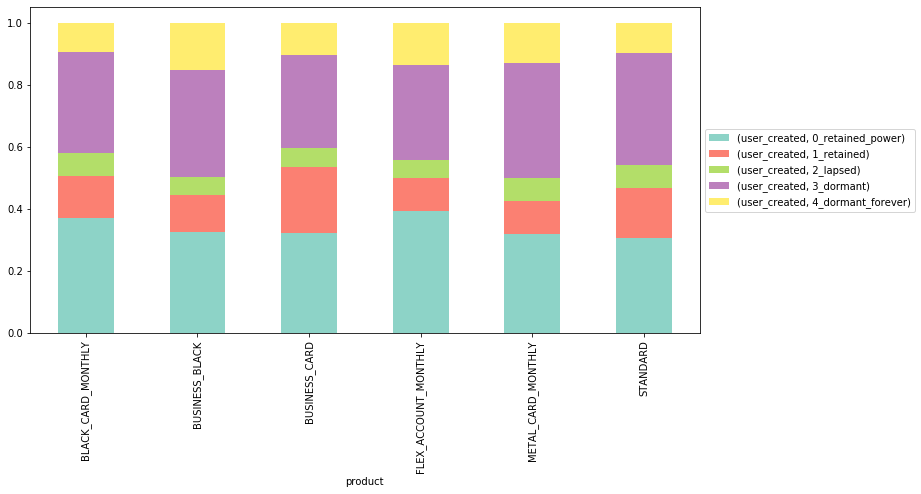

In [66]:
tps = df_users.pivot_table(
    values=["user_created"], index="product", columns="user_group", aggfunc="count"
)
tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set3")
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

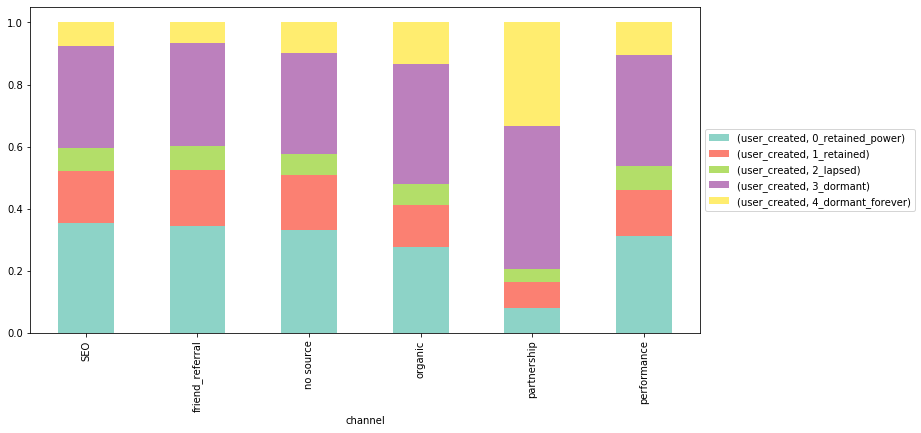

In [67]:
tps = df_users.pivot_table(
    values=["user_created"], index="channel", columns="user_group", aggfunc="count"
)
tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set3")
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

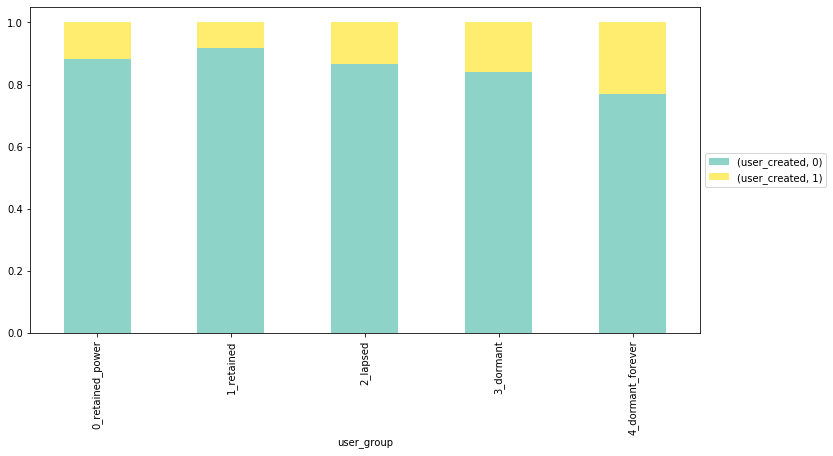

In [68]:
tps = df_users.pivot_table(
    values=["user_created"], index="user_group", columns="arrears_flg", aggfunc="count"
)
tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set3")
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

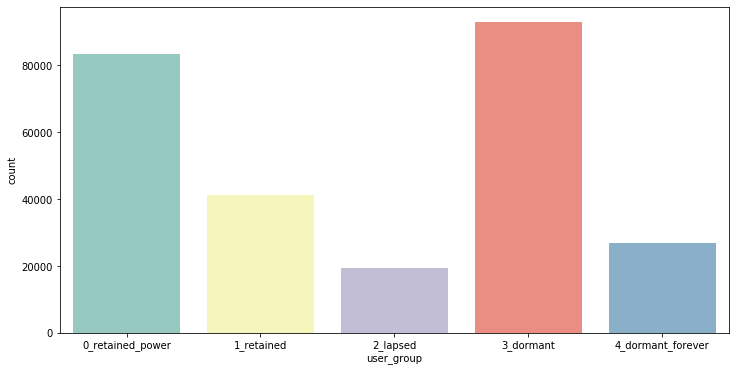

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(x="user_group", data=df_users, palette="Set3")

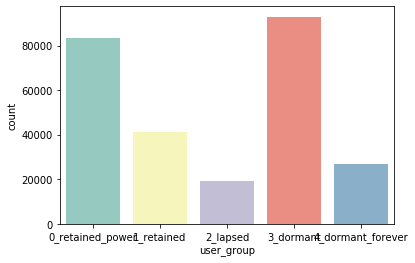

In [70]:
sns.countplot(x="user_group", data=df_users, palette="Set3")